# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function to be integrated.

In [3]:
def f(x):
    '''Function defined above.'''
    result = numpy.sin(x)*numpy.power(x,2)
    return result
    raise NotImplementedError()

Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Analytically, derive the indefinite integral of $f(x)$. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    '''Analytical integral of f(x).'''
    result = 2*x*numpy.sin(x) - numpy.cos(x)*(numpy.power(x,2) - 2) - 2
    return result
    raise NotImplementedError()

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the same interval $(x_{0},~x_{1})$.

In [8]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from x0 to x1.'''
    result =  2*xmax*numpy.sin(xmax) - numpy.cos(xmax)*(numpy.power(xmax,2) - 2) - ( 2*xmin*numpy.sin(xmin) - numpy.cos(xmin)*(numpy.power(xmin,2) - 2))
    return result
    raise NotImplementedError()

Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{0},~x_{1})$ using Simpson's rule with $N$ panels.

In [10]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    Deltax = numpy.divide((xmax-xmin),(2*N))
    k = 0
    x = xmin
    for i in range(0,N):
        k += f(x) + 4*f(x+Deltax) + f(x+2*Deltax)
        x += 2*Deltax
        
    return (Deltax/3)*(k)
    raise NotImplementedError()

Make sure you have implemented Simpson's rule correctly:

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0,0.5,'Fractional error')

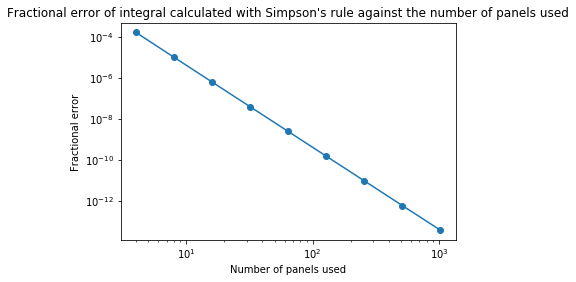

In [13]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
fracerror = [-(integrate_numeric(x0, x1,4)-result_analytic)/result_analytic,-(integrate_numeric(x0, x1,8)-result_analytic)/result_analytic,-(integrate_numeric(x0, x1,16)-result_analytic)/result_analytic,-(integrate_numeric(x0, x1,32)-result_analytic)/result_analytic,-(integrate_numeric(x0, x1,64)-result_analytic)/result_analytic,-(integrate_numeric(x0, x1,128)-result_analytic)/result_analytic,-(integrate_numeric(x0, x1,256)-result_analytic)/result_analytic,-(integrate_numeric(x0, x1,512)-result_analytic)/result_analytic,-(integrate_numeric(x0, x1,1024)-result_analytic)/result_analytic]
plt.loglog(panel_counts, fracerror, '-o')
plt.title("Fractional error of integral calculated with Simpson's rule against the number of panels used")
plt.xlabel("Number of panels used")
plt.ylabel("Fractional error")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The higher the number of panels, the higher is the accuracy of the numerical method. The error is proportional to N^-4 where N is the number of panels. If the number of panels taken is too large there will be numerical round-off issues and the error will become bigger.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

For the trapezium rule the error is approximately N^-2, where N is the number of panels.